Note the values of parameters are changed so some values will comments will differ

#Experiment -1 : Conversion of imbalanced dataset to balanced dataset


---



*   Aakanksha Singh     
MBATECH EXTC 4th year     
 70431118041   , J233




In [3]:
import imblearn   #library in python to deal with imbalance dataset
from collections import Counter  #dpeicts how many labels,no of samples for particular class
from sklearn.datasets import make_classification #generate datasets/samples from sklearn
from matplotlib import pyplot #to draw images
from numpy import where  #to execute samples



In [48]:
#generation of datasets  x- i/p samples y-labels
#n_redundant = 0 for no outliers,no of cluters for each sample/label to 1,99% of samples in 1 cluster be 1,no shuffling for flip_y,random_state =0 for sample getting same values
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)
#counter will assign how many samples are in X or y
counter = Counter(y)
print(counter)
 

Counter({1: 950, 0: 50})


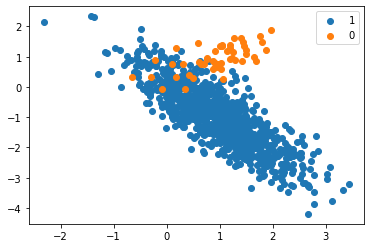

In [49]:
#plot the distribution of imbalanced dataset
for lab,_ in  counter.items():
  rows = where(y==lab)
  pyplot.scatter(X[rows,0],X[rows,1],label=str(lab))#those samples whose label is 0(feature 1) is on x axis and vice versa
  pyplot.legend()

In [50]:
X[0,:]     #0th value and corresponding label

array([ 1.5044727 , -2.36814793])

In [51]:
y[0]       

1

In [52]:
X[10,:]    #10th value and corresponding label

array([ 0.66997372, -1.85322034])

In [53]:
y[10]    

1

In [54]:
#Now we'll balance the dataset 
from imblearn.over_sampling import SMOTE

In [55]:
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)
over_s =SMOTE()  #calling SMOTE function to convert imabalnced dataset into balanced datset
X,y = over_s.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({1: 950, 0: 950})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


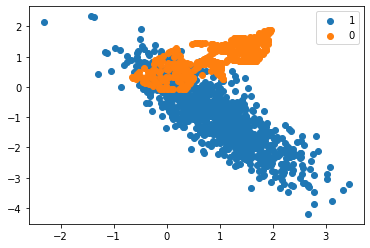

In [56]:
#plot the distribution of balanced dataset with SMOTE
for lab,_ in  counter.items():
  rows = where(y==lab)
  pyplot.scatter(X[rows,0],X[rows,1],label=str(lab))#those samples whose label is 0(feature 1) is on x axis and vice versa
  pyplot.legend()

In [57]:
#hence there is no separability between the balanced dataset thus using another method


In [58]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline

In [59]:
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)
over_s = SMOTE(sampling_strategy=0.1) #minority sample should be 10% of the majority sample
under_s = RandomUnderSampler(sampling_strategy=0.5) #majority sample should be no of minority sample/0.5
S = [('o',over_s),('u',under_s)]  #o is over sampling  defined as  first step and u is under sampling defined by second step
pipeline = Pipeline(steps=S)  #pipeline has 2 steps(first oversample and then undersample)
X,y = pipeline.fit_resample(X,y)  #using pipeline to fit the dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [60]:
counter = Counter(y)
print(counter)
#here minority sample is 990 and majority sample is 1980

Counter({1: 190, 0: 95})


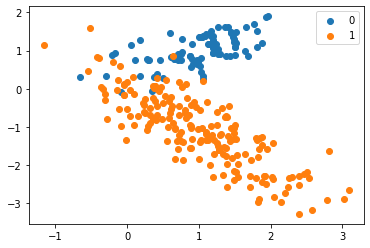

In [61]:
#plot the distribution of balanced dataset with SMOTE and UnderSampling
for lab,_ in  counter.items():
  rows = where(y==lab)
  pyplot.scatter(X[rows,0],X[rows,1],label=str(lab))#those samples whose label is 0(feature 1) is on x axis and vice versa
  pyplot.legend()

In [62]:
#Now we'll work on the classifier

In [63]:
#importing libraries
from numpy import mean
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [70]:
#Applying descision tree classifier on imbalanced dataset
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)
model = DecisionTreeClassifier()   
crossVal = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1) #means all samples of dataset into 10bins and every bin is selected once for training th model (each bin =1000 samples),randomly select from 10 folds,repeat the process 3times and then avg is calculated
score = cross_val_score(model,X,y,scoring='roc_auc',cv=crossVal) # check the performance parameter of trained model, so more the value of auc more seperability
mean_roc_auc = mean(score)
print(mean_roc_auc)

0.85859649122807


In [71]:
#Applying decsison tree clasifier on balanced dataset from SMOTE
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)
#generate the pipeline
S = [('o',SMOTE()),('model',DecisionTreeClassifier())] # first apply SMOTE ,then apply DT classifier
pipeline = Pipeline(steps=S) #apply pipeline 

crossVal = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1) #means all samples of dataset into 10bins and every bin is selected once for training th model (each bin =1000 samples),randomly select from 10 folds,repeat the process 3times and then avg is calculated
score = cross_val_score(pipeline,X,y,scoring='roc_auc',cv=crossVal) # check the performance parameter of trained model, so more the value of auc more seperability
mean_roc_auc = mean(score)
print(mean_roc_auc)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

0.8671929824561405


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [72]:
#Applying decsison tree clasifier on balanced dataset from SMOTE and Undersampling
X,y = make_classification(n_samples=1000,n_features=2,
                          n_redundant=0,n_clusters_per_class=1,weights=[0.05,0.95],flip_y=0,random_state=1)

over_s = SMOTE(sampling_strategy=0.1) 
under_s = RandomUnderSampler(sampling_strategy=0.5)
model = DecisionTreeClassifier()
#generate the pipeline
S = [('over',over_s),('under',under_s),('model',model)] # first apply SMOTE ,then apply DT classifier
pipeline = Pipeline(steps=S) #apply pipeline 

crossVal = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1) #means all samples of dataset into 10bins and every bin is selected once for training th model (each bin =1000 samples),randomly select from 10 folds,repeat the process 3times and then avg is calculated
score = cross_val_score(pipeline,X,y,scoring='roc_auc',cv=crossVal) # check the performance parameter of trained model, so more the value of auc more seperability
mean_roc_auc = mean(score)
print(mean_roc_auc)

0.8675438596491227


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Conclusion:

1) On creation of dataset: The given dataset is imbalanced,it has 95% of samples under majority class and remaining samples in minority class.Area under the curve(auc) is 0.85

2)Imbalanced dataset is converted to balanced dataset using SMOTE which comes under the technique of oversampling.Area under the curve(auc) increases from 0.85 to 0.87 respsectively

3)Dataset is oversampled using SMOTE followed by undersampling using RandomUnderSampler.Area under the curve(auc) increases from 0.87 to 0.88,this is because undersampler reduces mixing of majority and minority of under samples.
